# CH2. 그래프 머신러닝

김보람  
2023-04-06

# ref

-   [그래프
    머신러닝](https://product.kyobobook.co.kr/detail/S000200738068)

-   [github](https://github.com/PacktPublishing/Graph-Machine-Learning)

-   [Machine Learning on Graphs: A Model and Comprehensive
    Taxonomy](https://arxiv.org/abs/2005.03675)

In [1]:

import matplotlib.pyplot as plt
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

# Node2Vec

-   [github](https://github.com/eliorc/node2vec)

-   그래프 노드 간의 유사성을 보존하며 그래프의 구조를 임베딩하는 임베딩
    알고리즘

-   DeepWalk -\> Node2Vec(랜덤 워크의 방향성 제어 가능)

-   노드 탐색 방향성 제어를 위한 2개 매개변수 사용

-   `return parameter`: 이전에 방문한 노드와 얼마나 멀리 떨어져있는지
    거리

-   `in-out parameter`: 이전 노드와 멀리 떨어진 노드의 샘플링하는 정도를
    조절

## Node2Vec 알고리즘 구현 방법

`1` 그래프 생성

`2` Node2Vec 객체 생성

``` python
node2vec = Node2Vec(G, dimensions=, walk_length=, num_walks=, p=, q=, workers=)
```

-   dimensions : 임베딩할 벡터의 차원 수

-   walk_length : 랜덤 워크에서 한 번에 이동할 노드 수

-   num_walks : 랜덤 워크를 몇 번 반복할 것인지

-   p, q : 노드 탐색을 위한 확률값을 조정하는 매개변수

`3` 랜덤 워크를 수행하여 노드 시퀀스 생성

`4` 생성된 노드 시퀀스(그래프 내의 노드들이 순서) 임베딩

### 랜덤 워크(Random Walk)

-   그래프 내의 노드를 방문하며 노드 간의 관계를 탐색하는 과정

-   시작 노드에서 출발하여 현재 노드와 연결된 노드들 중 하나를 무작위로
    선택하여 이동

-   만약 선택된 노드가 이전에 방문한 노드이면 return parameter에 따라
    이전 노드로 다시 돌아갈 확률이 높아짐

-   반면, 이전 노드와 멀리 떨어진 노드를 샘플링하는 경우에는 in-out
    parameter에 따라 더 멀리 떨어진 노드를 샘플링하는 비율이 조절

-   랜덤 워크 시퀀스는 각 노드의 방문 횟수, 이웃 노드의 구성 등 그래프의
    구조적 특성을 반영

## Node2Vec example

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 346.40it/s]

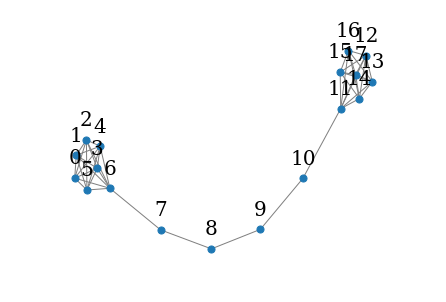

In [4]:

import networkx as nx
from node2vec import Node2Vec

G = nx.barbell_graph(m1=7, m2=4)  # 바벨 그래프 생성
draw_graph(G, nx.spring_layout(G))

node2vec = Node2Vec(G, dimensions=2) # 그래프의 각 노드를 2차원 벡터로 생성
model = node2vec.fit(window=10) # 원본 그래프 노드에 임베딩 알고리즘 적용해 생성된 2차원 벡터
     

# Edge2Vec

-   그래프의 엣지에 대한 저차원 벡터 표현 학습

-   목적은 그래프의 엣지의 구조적 및 의미적 특성을 포착해 링크 예측이나
    또는 분류와 같은 하위 작업에 사용하는 저차원 벡터 표현 학습

## Edge2Vec 알고리즘 구현 방법

`1` 그래프 데이터 로딩

`2` 모델 학습

`3` 엣지 임베딩: 학습된 Edge2Vec모델을 이용해 각 엣지를 임베딩 벡터로
변환하고 임베딩 벡터의 차원 수는 모델 하이퍼파라미터 값에 따른다.

`4` 분류 또는 유사도 측정

## Edge2Vec example

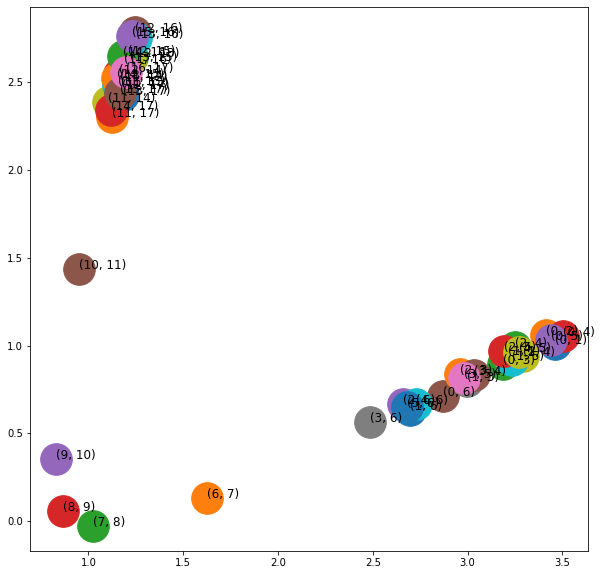

In [14]:
from node2vec.edges import HadamardEmbedder # Node2Vec 모델을 사용하여 학습된 그래프 임베딩 모델에서 HadamardEmbedder를 이용하여 엣지 임베딩 벡터를 생성하고, 그것을 시각화하는 코드

edges_embs = HadamardEmbedder(keyed_vectors=model.wv) # model.wv : 학습된 노드 입베딩 벡터를 가지고있는 객체
fig, ax=plt.subplots(figsize=(10,10))

for x in G.edges():
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)  # 엣지를 해당하는 점위에 텍스트로 나타냄, 즉 해당 점의 x,y좌표를 설정

-   HadamardEmbedder: 두 노드의 임베딩 벡터를 element-wise 곱한 결과를
    사용하여 엣지의 임베딩 벡터를 생성

# Graph2Vec

-   그래프를 분할하여 분할된 부분 그래프들의 순서를 고려하여 벡터로
    변환하는 과정 반복

-   분할된 부분 그래프의 순서가 달라도 동일한 벡터로 변환 가능

## Graph2Vec 알고리즘 구현 방법

`1` 그래프 분할: 서로 겹치지 않게 입력 그래프를 여러 개의 부분 그래프로
분할

`2` 순서 부여: 분할된 부분 그래프에 순서를 부여

`3` 부분 그래프 임베딩

`4` 전체 그래프 임베딩

`5` 분류 또는 유사도 측정

## Graph2Vec Example

In [17]:
pip install karateclub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 81.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 94.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 102.2 MB/s eta 0:00:00
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=101987 sha256=9b0452b9dfbfaa045ccbf70aeee54c5ac34fdb4bf2d2af2d6facab840d6d499d
  Stored in directory: /home/coco/.cache/pip/wheels/2b/93/72/8e0b3ec687bea23bd34bbb723a82fcb6b074cb756a29441f0c
Successfully built karateclub
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
 

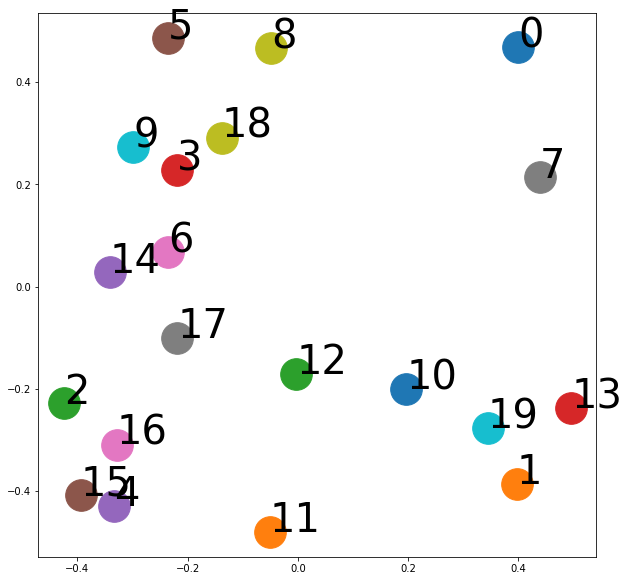

In [20]:
import random
import matplotlib.pyplot as plt

from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)  # 노드 갯수
    k = random.randint(5, n)   # k-최근접 이웃 개수
    p = random.uniform(0, 1)   # 연결 확률 파라미터
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]   # 함수를 사용하여 20개의 무작위 그래프 생성

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)  # 임베딩 벡터 차원수: 2차원
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)

# 임베딩 알고리즘의 분류

## 얕은 임베딩

-   학습된 입력 데이터에 대한 임베딩 값만 학습하고 반환

-   Node2Vec, Edge2Vec, Graph2Vec

-   학습한 데이터의 벡터 표현만 반환

-   보이지 않는 데이터에 대한 임베딩 벡터는 못얻는다.

-   지도학습/비지도학습 각각 정의 가능

``` python

model.fit(graphs_list) #graphs_list 학습
embedding=model.get_embedding()[i]
```

## 그래프 자동 인코딩

-   보이지 않는 인스턴스에 대한 임베딩 벡터도 생성

-   비지도 학습에 적합

``` python

model.fit(graphs_list) #graphs_list 학습
embedding=model.get_embedding(G) #보이지 않는 새로운 그래프 G의 임베딩 벡터 생성
```

## 근방 집계

-   그래프 수준에서 임베딩 추출

-   노드는 일부 소석승 기반으로 라벨 지정

-   일반 사상 함수 $f(G)$를 학습 할 수 있고 보이지 않는 인스턴스에 대한
    임베딩 벡터도 생성 가능

## 그래프 정규화

-   그래프를 입력으로 받지 않는다.

-   프로세스를 정규화하고자 **상호작용**을 나타내는 특정집합 학습

-   준지도학습/지도 학습에 사용